In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def show(image):
    cv2.imshow('image', image)
    if cv2.waitKey(0)==27:
        cv2.destroyAllWindows()


In [2]:
img=cv2.imread(r'C:/Users/jithi/Desktop/lena.jpg')

In [3]:
show(img)

In [4]:
#HSV
lena_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(lena_hsv)

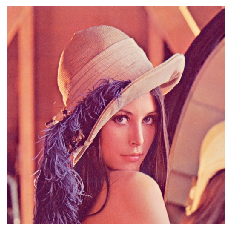

In [6]:
#RGB
lena_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show(lena_rgb)

In [23]:
#Splitting
lena_b, lena_g, lena_r=cv2.split(img)

In [24]:
show(lena_b)

In [25]:
show(lena_g)

In [26]:
show(lena_r)

In [27]:
#Merging
merged=cv2.merge([lena_b, lena_g, lena_r])

In [28]:
show(merged)

In [30]:
#Channel Colors
blank=np.zeros(img.shape[:2], dtype='uint8')

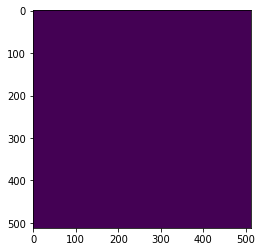

In [31]:
plt.imshow(blank)

In [32]:
blank.shape

(512, 512)

In [33]:
img.shape[:2]

(512, 512)

In [38]:
blue_lena=cv2.merge([lena_b, blank, blank])
red_lena=cv2.merge([blank, lena_g, blank])
green_lena=cv2.merge([blank, blank, lena_r])

In [39]:
show(blue_lena)
show(red_lena)
show(green_lena)

In [50]:
#Average
avg=cv2.blur(img, (9,9))

In [52]:
show(avg)

In [57]:
#Gaussian Blur
gauss=cv2.GaussianBlur(img, (7,7), 0)
show(gauss)

In [64]:
#Median
median=cv2.medianBlur(img, 3)
show(median)

In [65]:
#Bilateral
bi=cv2.bilateralFilter(img, 5, 15, 15)
show(bi)

In [66]:
blank.shape

(512, 512)

In [67]:
show(blank)

In [93]:
#Bitwise And
blank=np.zeros((500, 500), dtype='uint8')
rect=cv2.rectangle(blank.copy(), (30, 30), (370, 370), 255, -1)
circle=cv2.circle(blank.copy(), (200,200), 200, 255, -1)
show(rect)
show(circle)

In [94]:

rect_and_circle=cv2.bitwise_and(rect, circle)
show(rect_and_circle)

In [81]:
show(rect)

In [95]:
#Bitwise or
rect_or_circle=cv2.bitwise_or(rect, circle)
show(rect_or_circle)

In [98]:
#Bitwise xor
rect_xor_circle=cv2.bitwise_xor(rect, circle)
show(rect_xor_circle)

In [99]:
#Bitwise not
inv_rect=cv2.bitwise_not(rect)
show(inv_rect)

In [5]:
#Masking
show(img)

In [6]:
(h, w)=img.shape[:2]
blank=np.zeros((h,w), dtype='uint8')
mask=cv2.rectangle(blank, (h//2, w//2), (h, w), 255, -1)
masked=cv2.bitwise_and(img, img, mask=mask)

In [8]:
show(masked)

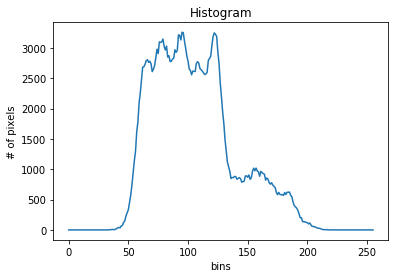

In [11]:
#Grayscale Histogram
import matplotlib.pyplot as plt
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist=cv2.calcHist([img],[0], None, [256], [0, 256])
plt.figure()
plt.title('Histogram')
plt.xlabel('bins')
plt.ylabel('# of pixels')
plt.plot(hist)
plt.show()


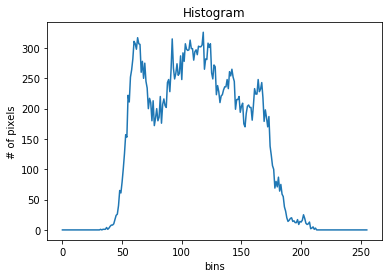

In [152]:
#Masked Histogram
dark=np.zeros((img.shape[0], img.shape[1]), dtype='uint8')
mask=cv2.circle(dark, (img.shape[0]//2, img.shape[1]//2), 100, 255, -1)
hist_masked=cv2.calcHist([img], [0], mask, [256], [0,256])
plt.figure()
plt.title('Histogram')
plt.xlabel('bins')
plt.ylabel('# of pixels')
plt.plot(hist_masked)
plt.show()

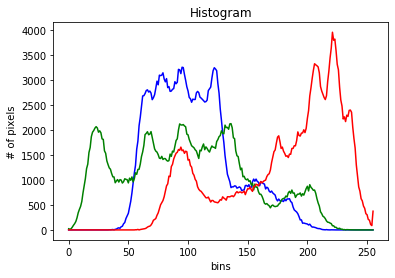

In [169]:
#Histogram Colors
colors=('b', 'g', 'r')
for i, col in enumerate(colors):
    hist=cv2.calcHist([img], [i], None, [256], [0,256])
    plt.title('Histogram')
    plt.xlabel('bins')
    plt.ylabel('# of pixels')
    plt.plot(hist, color=col)
plt.show()

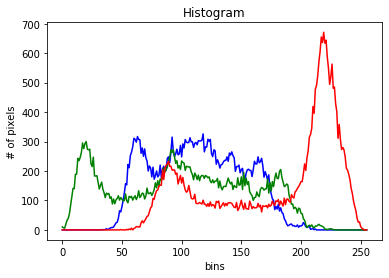

In [170]:
#Histogram Colors Masked
dark=np.zeros((img.shape[0], img.shape[1]), dtype='uint8')
mask=cv2.circle(dark, (img.shape[0]//2, img.shape[1]//2), 100, 255, -1)
colors=('b', 'g', 'r')
for i, col in enumerate(colors):
    hist=cv2.calcHist([img], [i], mask, [256], [0,256])
    plt.title('Histogram')
    plt.xlabel('bins')
    plt.ylabel('# of pixels')
    plt.plot(hist, color=col)
plt.show()

In [28]:
#Simple Thresholding
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold, thresh=cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
show(thresh)

In [27]:
#Inverse Thresholding
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold, thresh_inv=cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
show(thresh_inv)

In [34]:
#Adaptive Thresholding
adaptive=cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

In [35]:
adaptive

array([[255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255]], dtype=uint8)

In [47]:
#Laplacian
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lap=cv2.Laplacian(img, cv2.CV_64F)
show(lap)

In [55]:
#Sobel
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobel_x=cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobel_y=cv2.Sobel(img, cv2.CV_64F, 0, 1)
sobel=cv2.bitwise_or(sobel_x, sobel_y)

In [56]:
show(sobel)